# Final Project - Programming for Data Science

## Team members

1. Trần Thành Long - 22127250

2. Nguyễn Hoàng Trung Kiên - 22127478

## Dataset

[Steam games dataset](https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset)

## Import libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Collecting data

In [19]:
df = pd.read_csv('dataset.csv')

### What subject is your data about? What is the source of your data?

- **Subject**: The dataset includes information on over 60000 video games from Steam platform (from 1997 to 2023).
- **Source**: [Kaggle](https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset)

### Do authors of this data allow you to use like this? ###

- **Yes**, based on this data's license: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).

### How did authors collect data? ###

- User tags info and data from [howlongtobeat.com](https://howlongtobeat.com/) on over 60000 Steam games (from 1997 to 2023).

## 2. Exploring data and preprocessing

### How many rows and how many columns?

In [20]:
df.shape

(63543, 11)

$\rightarrow$ There are ```63543``` rows and ```11``` columns.

### What is the meaning of each row?

In [21]:
df.head(10)

,id,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,96000,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich|Steampunk|Adventure|Atmospheric|Puz...
1,262410,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror|First-Person|Historical|Multiplayer|Str...
2,1250410,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer|Adventure|VR|Action Roguelike|Phys...
3,365450,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror|Story Rich|Hacking|Crime|Multiplayer|Dy...
4,92800,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation|Strategy|Building|Puzzle|Science|Pr...
5,1301720,Escape Room - Der kranke Kollege,2020.0,NaN,8.0,6.828914,1.69,2.49,2.31,0.62,Horror|First-Person|Crime|Multiplayer|Adventur...
6,589870,Learn to Fly 3,2017.0,NaN,8.0,15.571125,3.02,6.35,11.78,8.76,Multiplayer|Strategy|Action|Adventure|Physics|...
7,736260,Baba Is You,2019.0,87.0,9.0,49.397183,6.84,19.28,46.70,39.86,Horror|Sokoban|Strategy|Level Editor|Pixel Gra...
8,585420,Trailmakers,2019.0,NaN,8.0,11.906299,12.18,85.26,406.74,394.56,Robots|Co-op Campaign|Automobile Sim|Action-Ad...
9,1455840,Dorfromantik,2022.0,NaN,9.0,32.146377,5.25,13.60,63.94,58.69,Procedural Generation|Strategy|Soundtrack|Atmo...


- Each row represents a record of a Steam game.

### Are there duplicated rows?

In [22]:
df.duplicated().sum()

np.int64(0)

$\rightarrow$ **No** duplicated rows.

### What is the meaning of each column?

In [23]:
df.columns

Index(['id', 'name', 'year', 'metacritic_rating', 'reviewer_rating',
       'positivity_ratio', 'to_beat_main', 'to_beat_extra',
       'to_beat_completionist', 'extra_content_length', 'tags'],
      dtype='object')

- ```id```: Game ID on steam platform.
- ```name```: Game name as appears on Steam platform.
- ```year```: Year of release.
- ```metacritic_rating```: Metacritic rating (the larger the better).
- ```reviewer_rating```: Game rating given by users on the 0-10 scale (the larger the better).
- ```positivity_ratio```: Number of positive reviews divided by the number of negative reviews.
- ```to_beat_main```: Time required to beat the main plot of the game.
- ```to_beat_extra```: Time required to beat the main and optional objectives of the game.
- ```to_beat_completionist```: Time required to complete every single objective of the game including gathering all collectibles.
- ```extra_content_length```: The difference between completionist time and extra time.
- ```tags```: User tags (features) of the game separated by vertical line.

### What is the current data type of each column? Are there columns having inappropriate data types?

In [24]:
df.dtypes

id                         int64
name                      object
year                     float64
metacritic_rating        float64
reviewer_rating          float64
positivity_ratio         float64
to_beat_main             float64
to_beat_extra            float64
to_beat_completionist    float64
extra_content_length     float64
tags                      object
dtype: object

### With each numerical column, how are values distributed?

- What is the percentage of missing values?

In [25]:
numerical_cols = ['id', 'year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']
missing_data = {numerical_col: sum(value == "?" or value != value for value in df[numerical_col]) / len(df[numerical_col]) * 100 for numerical_col in df[numerical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

id: 0.0 %
year: 0.1573737469115402 %
metacritic_rating: 93.83724407094408 %
reviewer_rating: 29.765670490848716 %
positivity_ratio: 3.167933525329304 %
to_beat_main: 71.98589931227673 %
to_beat_extra: 78.86942700218749 %
to_beat_completionist: 74.7635459452654 %
extra_content_length: 66.66509292919756 %


- The column(s) with the highest missing data ratio is ```metacritic_rating``` (~93.837%).
- The column(s) with the lowest missing data ratio is ```id``` (0%), has no missing data.

$\rightarrow$ Despite the large proportion of missing values in some columns, the quantity of the data records are still enough and helpful for analysis (63543 rows).

- Distribution of numeric columns:

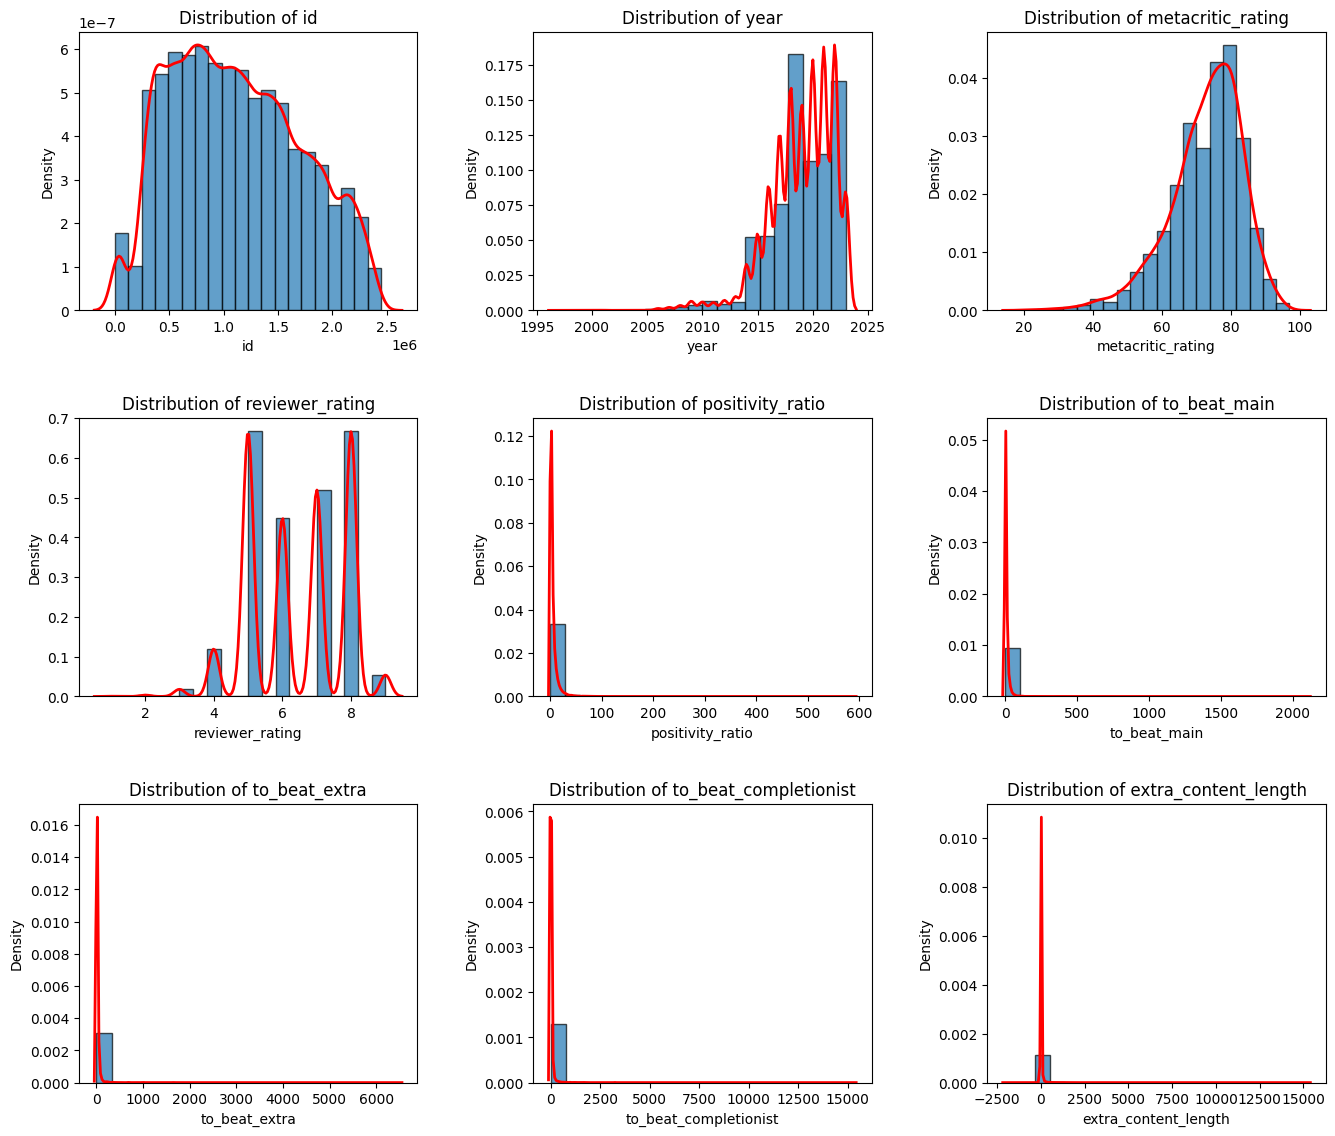

In [26]:
numeric_cols = ['id', 'year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']
plt.figure(figsize=(14, 12))  

for i in range(len(numeric_cols)):
    plt.subplot(3, 3, i + 1)  
    plt.hist(df[numeric_cols[i]], bins=20, edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(df[numeric_cols[i]], color='red', linewidth=2)
    plt.title(f'Distribution of {numeric_cols[i]}')
    plt.xlabel(numeric_cols[i])
    plt.ylabel('Density')

plt.tight_layout(pad=3.0)  
plt.show()

- **Comments**:
    - Most distributions tend to be slightly or significantly **skewed** to one side:
        - Left-skewed: ```year```, ```metacritic_rating```.
        - Right-skewed: ```positivity_ratio```, ```to_beat_main```, ```to_beat_extra```, ```to_beat_completionist```, ```extra_content_length```.
        
    $\rightarrow$ Heavily affected by **outliers**, requiring appropriate **handling measures**.
    
    - The distribution of ```reviewer_rating``` tends to **concentrate** around certain specific **bins**.

### With each categorical column, how are values distributed?

- What is the percentage of missing values?

In [27]:
categorical_cols = ['name', 'tags']
missing_data = {cate_col: sum(value == "?" or value != value for value in df[cate_col]) / len(df[cate_col]) * 100 for cate_col in df[categorical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

name: 0.0 %
tags: 0.0 %


$\rightarrow$ **No** missing data.

- How many different values? Show a few

In [28]:
distinct_values = df[['name', 'tags']].nunique()
print(distinct_values)

distinct_values_name = df['name'].unique()[:5]  
distinct_values_tags = df['tags'].unique()[:5]  

print("Distinct 'name' values:", distinct_values_name)
print("Distinct 'tags' values:", distinct_values_tags)


name    63186
tags    54024
dtype: int64
Distinct 'name' values: ['The Tiny Bang Story' 'World of Guns: Gun Disassembly'
 'Microsoft Flight Simulator 40th Anniversary Edition' 'Hacknet'
 'SpaceChem']
Distinct 'tags' values: ['Story Rich|Steampunk|Adventure|Atmospheric|Puzzle|Surreal|Collectathon|Comedy|Relaxing|Touch-Friendly|Classic|Funny|Mystery|Casual|Indie|Short|Cartoony|Retro|Logic|Cult Classic|Remake|Singleplayer|Minigames|Great Soundtrack|Hand-drawn|Colorful|Cute|Hidden Object|Family Friendly|2D|Stylized'
 'Horror|First-Person|Historical|Multiplayer|Strategy|Gun Customization|Action|Old School|Adventure|Military|Exploration|Puzzle|Free to Play|Co-op|FPS|Open World|Relaxing|Funny|3D|Casual|Indie|Shooter|America|Simulation|Singleplayer|Realistic|3D Platformer|Online Co-Op|Education|Logic|Sandbox'
 'Multiplayer|Adventure|VR|Action Roguelike|Physics|Atmospheric|Boxing|Surreal|Psychological Horror|Controller|Beautiful|Open World|Auto Battler|Flight|Sexual Content|Real-Time|Short|Life

- Are they abnormal?

$\rightarrow$ **No**.

## 3. Asking meaningful questions

### Question 1: How does the time allocation required to complete a game change over time?

#### Benefits of finding answer:
- **Research and gain** an overview of game development over time.
- **Provide** a basis for analysis and comparison with games in the present time and in the future, e.g. game designers can learn from historical trends to balance between creating engaging, shorter experiences versus sprawling, long-form games that could potentially cause player burnout.

#### How to find the answer by using data?
- Calculate the time allocation for each game and the average time allocation for all games each year by using ```to_beat_main```, and ```to_beat_completionist``` columns.
- Visualize the change, give comments and draw conclusions.

### Question 2: What are the trends in the shifting popularity of single-player and multiplayer games over the years?

#### Benefits of finding answer:
- **Understanding Player Preferences**: Identifies how gaming culture is evolving (e.g., a shift toward online multiplayer experiences or a resurgence in single-player narratives).
- **Guiding Game Development**: Helps game developers align their focus and provides insights into whether hybrid games (offering both modes) are worth investing in.
- **Player Community Insights**: Reflects the social aspect of gaming, whether players prefer playing with friends or immersing themselves in solo gameplay.

#### How to find the answer by using data?
- To address this question, we will approach it from two ways:
    - The average ```reviewer_rating``` for each game tag (**single-player**, **multiplayer** or both) over the years.
    - The number of games belonging to the **single-player**, **multiplayer** or both tags over the years.
- Visualize the trends, give comments and draw conclusions.

## 4. Preprocessing and analyzing data to answer each question

### 4.1. Preprocessing:

- ```id``` column is no longer helpful for further data exploration so it is unnecessary and will be removed.

In [29]:
del df['id']

- From the result of the percentage of missing values, the ```metacritic_rating``` column has the highest percentage, and it is not necessary to be used for answering questions, so it will also be removed.

In [30]:
del df['metacritic_rating']

- Based on the domain knowledge of the dataset, ```to_beat_extra``` and ```extra_content_length``` are implied by ```to_beat_main``` and ```to_beat_completionist```, so we will remove these 2 columns, which is redundant for analysis.

In [31]:
del df['to_beat_extra']
del df['extra_content_length']

- Remove rows with **year** == ```Nan```

In [32]:
df = df[df['year'].notna()]

- Sort the dataset by ```year```

In [33]:
df = df.sort_values(by='year', ascending=True, ignore_index=True)

- Convert ```year``` column into ```int``` type

In [34]:
df['year'] = df['year'].astype('int64')

#### 4.1.1. Preprocessing for question 1 ####

- Create dataframe for answering question 1 and drop unnecessary columns

In [35]:
df_q1 = df.drop(columns=['reviewer_rating', 'positivity_ratio', 'tags']) 

- Drop rows that have ```null``` or ```NaN``` values in ```to_beat_main``` and ```to_beat_completionist``` columns, since it may lead to a false record when filling ```to_beat_main``` or ```to_beat_completionist```. They may relate to each other (```to_beat_completionist``` is calculated by adding ```to_beat_main``` with ```extra_content_length```, which was removed earlier), so it is better to keep the existing records and not use the traditional filling methods.

In [36]:
df_q1 = df_q1.dropna(subset=['to_beat_main', 'to_beat_completionist'])
df_q1

,name,year,to_beat_main,to_beat_completionist
0,POSTAL,1997,2.54,9.73
2,Half-Life,1998,17.17,18.40
3,Half-Life: Opposing Force,1999,12.08,15.37
4,Legacy of Kain: Soul Reaver,1999,11.79,14.51
6,Ricochet,2000,40.00,73.92
...,...,...,...,...
63412,Zortch,2023,3.50,6.00
63418,Rome: The Mystery of the Chronovisor - Hidden ...,2023,14.74,18.90
63437,Dark Skies: The Nemansk Incident,2023,3.50,6.00
63439,Shame Legacy,2023,2.38,3.38


In [37]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12555 entries, 0 to 63440
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   12555 non-null  object 
 1   year                   12555 non-null  int64  
 2   to_beat_main           12555 non-null  float64
 3   to_beat_completionist  12555 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 490.4+ KB


$\rightarrow$ The dataset is still **big** enough for analysis ($12555$ samples).

#### 4.1.2. Preprocessing for question 2 ####

- Based on the distribution, the missing values of ```reviewer_rating``` and ```positivity_ratio``` will be filled by their **median**

In [38]:
df['reviewer_rating'] = df['reviewer_rating'].fillna(df['reviewer_rating'].median())
df['positivity_ratio'] = df['positivity_ratio'].fillna(df['positivity_ratio'].median())

- Convert ```reviewer_rating``` column into ```int``` type

In [39]:
df['reviewer_rating'] = df['reviewer_rating'].astype('int64')

- Create dataframe for answering question 2 and drop unnecessary columns

In [40]:
df_q2 = df.drop(columns=['to_beat_main', 'to_beat_completionist'])

- Add ```Singleplayer / Multiplayer``` column, extracted from ```tags``` and drop the ```tags``` column

In [41]:
def play_mode(tags):
    if "Singleplayer" in tags and "Multiplayer" in tags:
        return "Both"
    elif "Singleplayer" in tags:
        return "Singleplayer"
    elif "Multiplayer" in tags:
        return "Multiplayer"
    else:
        return "None"

df_q2['Singleplayer / Multiplayer'] = [play_mode(tag) for tag in df_q2['tags']]
df_q2 = df_q2.drop(columns='tags')

In [42]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63443 entries, 0 to 63442
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        63443 non-null  object 
 1   year                        63443 non-null  int64  
 2   reviewer_rating             63443 non-null  int64  
 3   positivity_ratio            63443 non-null  float64
 4   Singleplayer / Multiplayer  63443 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.4+ MB


### 4.2. Answering Question 1: 

- We will focus on these following attributes:
    - ```to_beat_main```: Time required to beat the main plot of the game (main content).
    - ```to_beat_completionist```: Time required to complete every single objective of the game including gathering all collectibles (main and extra content).

$\rightarrow$ Calculate the time allocation (in percentage) between the main content and the total content of each game.

In [43]:
df_q1 = df_q1.copy()
# Calculate
df_q1['main_content_time_allocation'] = df_q1['to_beat_main'] / df_q1['to_beat_completionist'] * 100 # By percentage
# Sort by main_content_time_allocation column in the descending order
df_q1 = df_q1.sort_values(by='main_content_time_allocation', ascending=False)
df_q1

,name,year,to_beat_main,to_beat_completionist,main_content_time_allocation
21108,11-11 Memories Retold,2018,57.62,52.90,108.922495
25759,ART SQOOL,2019,2.51,2.43,103.292181
4889,BeamNG.drive,2015,7.91,7.84,100.892857
53466,Space Route,2022,2.50,2.50,100.000000
19832,Ayahuasca: Polyventure,2018,0.47,0.47,100.000000
...,...,...,...,...,...
60531,Spin Rhythm XD,2023,3.29,1104.83,0.297783
52315,SudoKube,2022,0.07,49.58,0.141186
16078,Sudokube,2017,0.07,49.58,0.141186
42152,Amazing Fix,2021,2.00,1654.76,0.120863


- There is a **conflict** here as the allocated time for main content **exceeds** the total content in some games ($>100 \%$) $\rightarrow$ **Remove** these rows

In [44]:
# Only keep rows have valid main_content_time_allocation (<= 100)
df_q1 = df_q1[df_q1['main_content_time_allocation'] <= 100]
df_q1

,name,year,to_beat_main,to_beat_completionist,main_content_time_allocation
53466,Space Route,2022,2.50,2.50,100.000000
19832,Ayahuasca: Polyventure,2018,0.47,0.47,100.000000
50785,Hell Mission,2022,4.00,4.00,100.000000
61707,Day of the dead,2023,12.05,12.05,100.000000
62377,RE:CALL,2023,0.47,0.47,100.000000
...,...,...,...,...,...
60531,Spin Rhythm XD,2023,3.29,1104.83,0.297783
52315,SudoKube,2022,0.07,49.58,0.141186
16078,Sudokube,2017,0.07,49.58,0.141186
42152,Amazing Fix,2021,2.00,1654.76,0.120863


- Calculate the average time allocation for main content of all games each year:

In [45]:
# Calculate
avg_time_allocation_by_year = df_q1.groupby('year')[['main_content_time_allocation']].mean()
avg_time_allocation_by_year

,main_content_time_allocation
year,
1997,26.104830
1998,93.315217
1999,79.924486
2000,75.626003
2001,73.097043
2002,77.520502
2003,22.758150
2004,49.714471
2005,47.036250


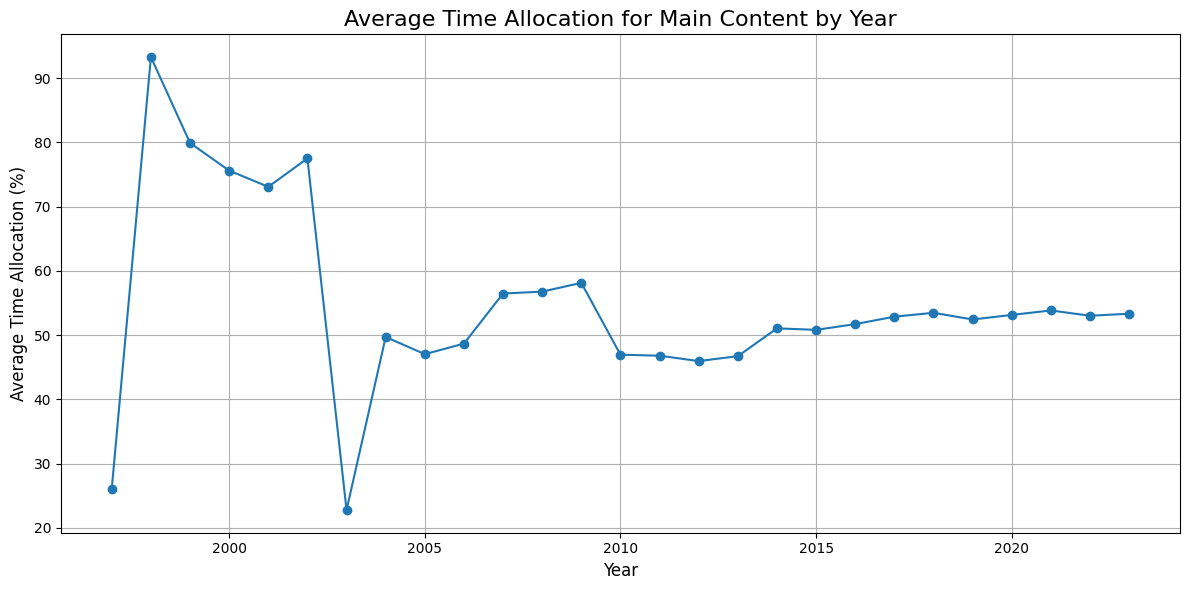

In [46]:
# Visualize by line chart
plt.figure(figsize=(12, 6))
plt.plot(avg_time_allocation_by_year.index, avg_time_allocation_by_year['main_content_time_allocation'], marker='o', label='Main Content Time Allocation')
plt.title('Average Time Allocation for Main Content by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Time Allocation (%)', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#### Comments:
- **Before** 2004: Games tended to focus **exclusively** on **either** main content or extra content.
- **From** 2004 **onward**: Games began to **balance** between main content and extra content, with a distribution hovering **around** $50 \%$.
- **During a short period** from 2007 to 2009, the allocation of time to main content **slightly increased** (approaching $60 \%$) but subsequently **returned** to a **balanced** level ($50 \%$).
- **From** 2010 to the **present**: The allocation of time for main content has shown a **slight upward** trend over time, but the **differences** between years are **minimal**.

#### Conclusions:
- Recent games tend to strike a **balance** between the time allocated for **main** content and **extra** content, ensuring that the **core narrative** each game aims to convey is delivered, while also providing **variety and richness** $\rightarrow$ Help **avoid** boredom and fatigue for players.

### 4.3. Answering Question 2: 

#### Strategies explanation:
- In this question, we might have some concerns: **Why** do we only use **reviews from game reviewers** (```reviewer_rating```) to make **general rating** of games instead of **compiling reviews** from both them and **regular gamers** (```positvity_ratio```)?
- First, we will check the correlation between the two attributes ```reviewer_rating``` and ```positivity_ratio```:

In [47]:
correlation = df_q2[['reviewer_rating', 'positivity_ratio']].corr()
correlation

,reviewer_rating,positivity_ratio
reviewer_rating,1.000000,0.510751
positivity_ratio,0.510751,1.000000


$\rightarrow$ We can see that the **correlation** between these two columns is only **moderate positive** (~0.511).

We will **analyze** ```positivity_ratio``` column as follows:
- ```positivity_ratio``` column provides information about the ratio of the number of positive reviews to the number of negative reviews from players.
- To make the data in this column more **intuitive**, we will create a **new column**, ```overall_positivity_ratio```. This column will indicate the **ratio** of **positive** reviews to the **total** number of reviews from players.
- Formula: $\text{Overall Positivity Ratio} = \frac{\text{Positivity Ratio}}{\text{Positivity Ratio} + 1}, \text{Positivity Ratio} \geq 0$

In [48]:
df_q2['overall_positivity_ratio'] = df_q2['positivity_ratio'] / (df_q2['positivity_ratio'] + 1)
df_q2

,name,year,reviewer_rating,positivity_ratio,Singleplayer / Multiplayer,overall_positivity_ratio
0,POSTAL,1997,8,7.791457,Both,0.886253
1,Carmageddon Max Pack,1997,8,7.906977,Both,0.887728
2,Half-Life,1998,9,27.847231,Both,0.965335
3,Half-Life: Opposing Force,1999,9,19.693287,Singleplayer,0.951675
4,Legacy of Kain: Soul Reaver,1999,6,2.795309,Singleplayer,0.736517
...,...,...,...,...,...,...
63438,Mr. Hopp's Playhouse 3,2023,8,11.000000,Singleplayer,0.916667
63439,Shame Legacy,2023,5,1.439024,Singleplayer,0.590000
63440,Melon Journey: Bittersweet Memories,2023,8,6.875000,None,0.873016
63441,Forest Of Relics,2023,8,8.000000,Singleplayer,0.888889


- Check the correlation between ```reviewer_rating``` and ```overall_positivity_ratio```:

In [49]:
correlation = df_q2[['reviewer_rating', 'overall_positivity_ratio']].corr()
correlation

,reviewer_rating,overall_positivity_ratio
reviewer_rating,1.000000,0.746752
overall_positivity_ratio,0.746752,1.000000


- The **correlation** between these two columns is **strong positive** (~0.747) $\rightarrow$ We **only** need to use the data from ```reviewer_rating``` column for the **overall rating** of games.

- Drop ```positivity_ratio``` and ```overall_positivity_ratio``` columns:

In [50]:
df_q2 = df_q2.drop(columns=['positivity_ratio', 'overall_positivity_ratio'])
df_q2

,name,year,reviewer_rating,Singleplayer / Multiplayer
0,POSTAL,1997,8,Both
1,Carmageddon Max Pack,1997,8,Both
2,Half-Life,1998,9,Both
3,Half-Life: Opposing Force,1999,9,Singleplayer
4,Legacy of Kain: Soul Reaver,1999,6,Singleplayer
...,...,...,...,...
63438,Mr. Hopp's Playhouse 3,2023,8,Singleplayer
63439,Shame Legacy,2023,5,Singleplayer
63440,Melon Journey: Bittersweet Memories,2023,8,None
63441,Forest Of Relics,2023,8,Singleplayer


- **1st approach**: The average ```reviewer_rating``` for each game tag (**single-player**, **multiplayer** or both) over the years:

In [51]:
avg_rating_per_year = df_q2.groupby(['year', 'Singleplayer / Multiplayer'])['reviewer_rating'].mean().reset_index()
avg_rating_per_year

,year,Singleplayer / Multiplayer,reviewer_rating
0,1997,Both,8.000000
1,1998,Both,9.000000
2,1999,Multiplayer,8.000000
3,1999,Singleplayer,7.500000
4,2000,Multiplayer,8.500000
...,...,...,...
82,2022,Singleplayer,6.400375
83,2023,Both,6.371795
84,2023,Multiplayer,6.314607
85,2023,None,6.456704


- Skip ```None``` values:

In [52]:
avg_rating_per_year = avg_rating_per_year[avg_rating_per_year['Singleplayer / Multiplayer'] != 'None']
avg_rating_per_year

,year,Singleplayer / Multiplayer,reviewer_rating
0,1997,Both,8.000000
1,1998,Both,9.000000
2,1999,Multiplayer,8.000000
3,1999,Singleplayer,7.500000
4,2000,Multiplayer,8.500000
...,...,...,...
80,2022,Multiplayer,6.238636
82,2022,Singleplayer,6.400375
83,2023,Both,6.371795
84,2023,Multiplayer,6.314607


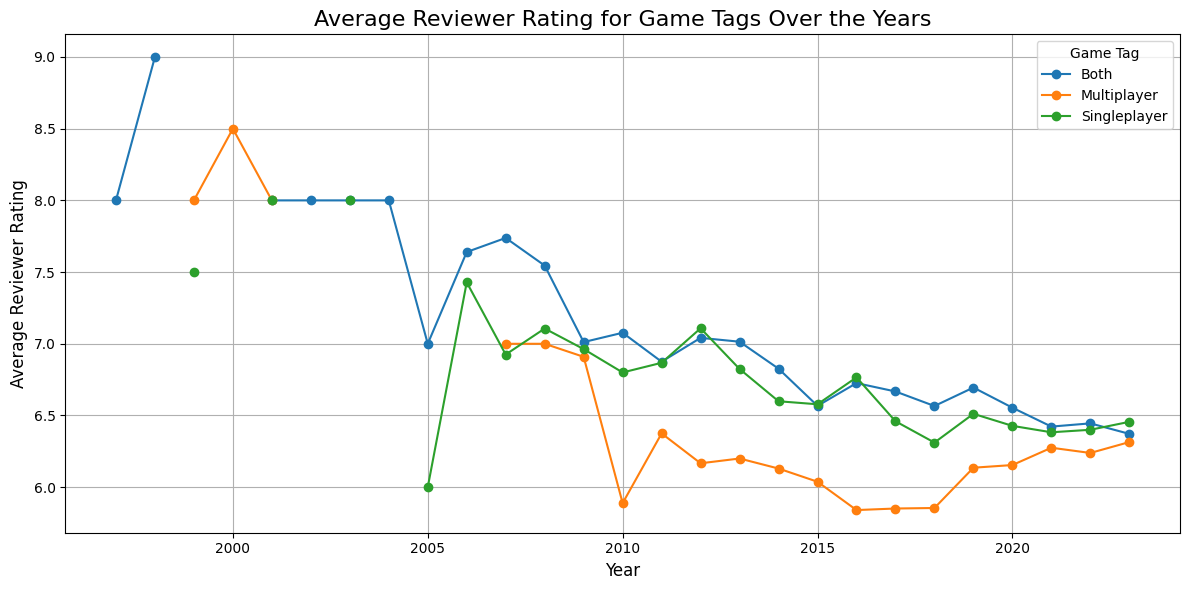

In [53]:
# Visualize by using line chart
pivot_data = avg_rating_per_year.pivot(index='year', columns='Singleplayer / Multiplayer', values='reviewer_rating')

plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)

plt.title('Average Reviewer Rating for Game Tags Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Reviewer Rating', fontsize=12)
plt.legend(title='Game Tag')
plt.grid(True)
plt.tight_layout()

plt.show()

- **Comments**:
    - Overall, games with **both** modes consistently received better reviews over time.
    - In the period before 2005, the dataset was generally quite **sparse** (*possibly due to a lack of samples*): Games having **both** single-player and multiplayer modes were rated the **highest** (9.0) in 1998 and games having only **single-player** mode recieved the **lowest** rating (6.0) in 2005.
    - For games featuring **both** single-player and multiplayer modes:
        - During the period from 2006 to 2010: Reviews of these games tended to **rise** sharply in the first half (peaking in 2007) and then **declined** significantly in the latter half of the period (reaching their lowest point in 2009).
        - During the period from 2011 to 2023 (when this dataset was finalized): Reviews of these games continued to **decline** over the years, with the lowest point being in 2023.
    - For games with only **single-player** mode:
        - During the period from 2006 to 2010: Reviews for these games **fluctuated** significantly year by year, peaking in 2006 and hitting their lowest point in 2010.
        - During the period from 2011 to 2020: Reviews for these games still showed considerable **fluctuations** year by year, with the peaks in later years trending downward, and the lowest peak being in 2019.
        - During the period from 2020 to 2023: Reviews for these games showed a slight **upward** trend, peaking in 2023.
    - For games with only **multiplayer** mode:
        - During the period from 2007 to 2018: Reviews for these games tended to **decline** significantly over the years, peaking in 2007 and hitting their lowest point in 2018.
        - During the period from 2018 to 2023: Reviews for these games experienced **strong growth**, peaking in 2023.

- **2nd approach**: The number of games belonging to the **single-player**, **multiplayer** or both tags over the years:

In [54]:
games_per_year = df_q2.groupby(['year', 'Singleplayer / Multiplayer']).size().reset_index(name='number_of_games')

# Skip None values
games_per_year = games_per_year[games_per_year['Singleplayer / Multiplayer'] != 'None']
games_per_year

,year,Singleplayer / Multiplayer,number_of_games
0,1997,Both,2
1,1998,Both,1
2,1999,Multiplayer,1
3,1999,Singleplayer,2
4,2000,Multiplayer,2
...,...,...,...
80,2022,Multiplayer,440
82,2022,Singleplayer,6404
83,2023,Both,390
84,2023,Multiplayer,178


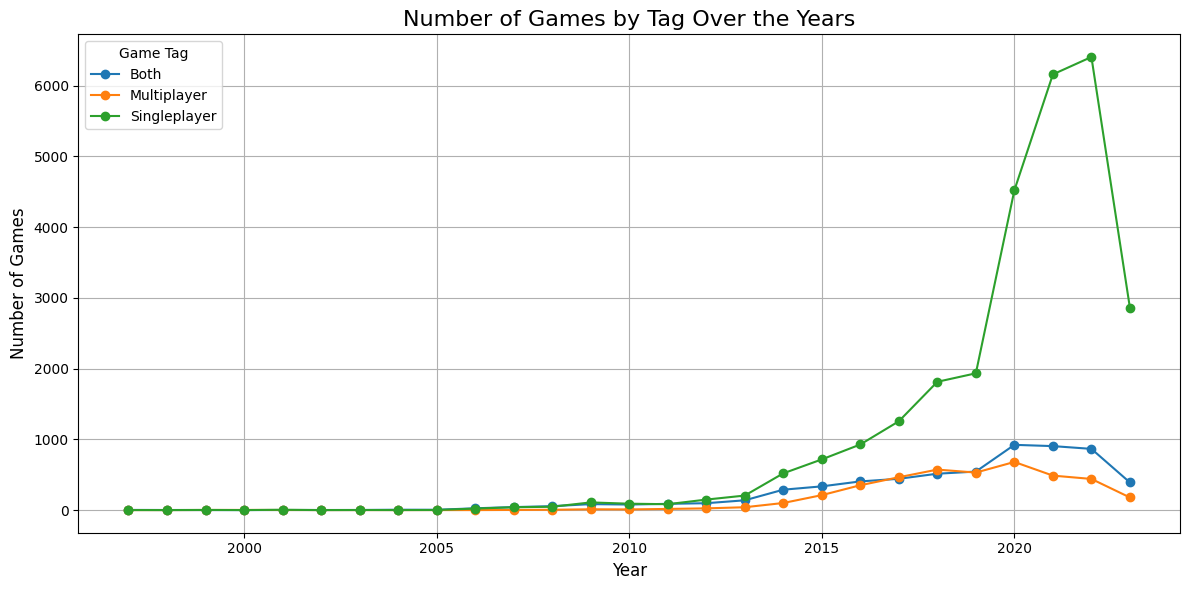

In [55]:
# Visualize by using line chart
pivot_data = games_per_year.pivot(index='year', columns='Singleplayer / Multiplayer', values='number_of_games').fillna(0)

plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)

plt.title('Number of Games by Tag Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.legend(title='Game Tag')
plt.grid(True)
plt.tight_layout()

plt.show()

- **Comments**:
    - During the period from 1997 to 2020:
        - The number of games gradually **increased** over the years, with a significant **spike** in the number of **single-player** games in 2020.
        - **Single-player** games overwhelmingly **outnumbered** the other two types.
    - The **spike** in the number of games during the period from 2019 to 2022 can be **explained** by the following **real-world events**:
        - The **rapid development** of **indie** games:
            - **Indie** games are mostly low-budget, affordable titles that require minimal investment in manpower and time, do not demand high-end hardware, and are easily accessible to a wide range of players.
            - This period marked the **release** of many **famous indie** games such as Telling Lies, Ori and the Will of the Wisps, etc.
            - Most indie games are **single-player** experiences, which explains the dramatic growth in this genre.
        - The **COVID-19** pandemic: Due to the pandemic, the **demand** for entertainment and gaming **increased** more than ever, driving the **creation** of numerous new games.
    - During the period from 2021 to 2023:
        - The number of **single-player** games continued to **grow** until 2022 but saw a great **decline** in 2023.
        - The number of **multiplayer** games and games with **both** modes decreased over the years, reaching their lowest point in 2023.

#### Conclusions:
- **1st approach**: People nowadays tend to prefer games that focus on just one of the two modes, especially **multiplayer** mode.
- **2nd approach**: Most game developers still focus heavily on investing in **single-player** games.

$\rightarrow$ Game developers should **pay** more attention and **invest** heavily in **multiplayer** games to align with the current and near-future **preferences** of players.

# 5. Reflection

## 1. Each member: What difficulties have you encountered?

### 1. 22127250 - Trần Thành Long:
#### Data Collection:

- In this project, our team made some oversights during the preliminary evaluation of the dataset, selecting one with a relatively high missing ratio 
$\rightarrow$ This led to numerous difficulties in the data analysis process and in answering questions.

#### Data Analysis:

- In this project, to answer question 2, I initially planned to combine ratings from reviewers and players (two different sources) to create an overall evaluation of a game. 

- However, these two attributes exhibit a strong correlation with each other. If the aggregation approach were still chosen, the results would be almost identical to selecting just one of the two ratings
$\rightarrow$ When aiming to aggregate certain attributes of a dataset as a basis for data analysis, it is advisable to first examine the correlation between these attributes. 
### 2. 22127478 - Nguyễn Hoàng Trung Kiên

- In the preprocessing step, it was sometimes a bit challenging since the dataset had so many columns that have large proportion of missing values. That makes columns selection task quite difficult. At first I decided to check missing data proportion, if any column which had the missing rate above 50%, I would eliminate that column, but there were 5/11 columns having the rate above 50%. Since one of the remain columns was ```id```, which was not really helpful for analysis, we only had 5 columns that were suitable, a very small number of columns $\rightarrow$ My team has decided to change the approach to check missing values by ```years```

- To handle missing values, it was hard to decide which methods of filling were suitable. The columns didn't have normal distribution, and since the main task is analysis, not modeling, some old filling methods like filling by ```mean```, ```mode```, ```median``` should be considered with each columns' domain knowledge carefully before implementing. (For example column ```reviewer_rating``` and ```positivity_ratio``` might relate to each other, if we chose inapproriate method, it could result a wrong record since we haven't dived into checking correlation between these columns, like it might have positive correlation but after filling, one was high and another was low). 

## 2. Each member: What have you learned?

### 1. 22127250 - Trần Thành Long:
#### Data Collection
- In addition to verifying copyright issues of the dataset, a preliminary check of its accuracy and authenticity before selection is also crucial.

- When using pre-existing datasets, it is essential to examine and consult reviews from multiple sources to ensure reliability and minimize limitations during data analysis.
#### Data Exploration:
- Visualization plays a crucial role in the data exploration process.

- For the statistical analysis of numerical attributes in a dataset, visualization helps us easily identify the distribution of data columns and relatively detect outliers within the data
$\rightarrow$ Contributes to minimizing conflicts between the dataset and real-world experiences.

#### Data Analysis
- Using fewer attributes not only enhances performance but also simplifies and clarifies the results of the analysis process.

### 2. 22127478 - Nguyễn Hoàng Trung Kiên

- Through the project, I can apply successfully the basic preprocessing steps which I've learned from the course, help me to identify missing values, duplicates,... of the dataset. This is a crucial part to prepare a clean data for further analyzing steps.

- Decide handling missing values method plays a vital role in preprocessing steps. When doing this, data distribution, domain knowledge, percentage of missng values or many other factors must be taken into clear consideration, to minimize its affection to the dataset.

- Besides preprocessing steps, I am able to learn how we make insights properly based on the dataset and visualizing them effectively.

- The project supports me to practice basic steps in data analysis, handled by helpful tools and materials such as ```pandas```, ```matplotlib```... which have been learned from the course.

## 3. Your group: If you had more time, what would you do?

- Select and examine datasets more carefully, ensuring both quantity and quality.

- Discover more potential insights and interesting points of the datasets, make more questions for analyzing helpful information.

- Make further analysis by other methods, such as correlation checking.

- Spend more time on preprocessing steps to find which methods are suitable for the dataset.